In [1]:
#from sympy import conjugate
from torch.autograd import Variable
import torch
from rsvg import rsvg
import pennylane as qml
import matplotlib.pyplot as plt
import numpy as np
from tools import *

# Escolha o número de qubits
* n_qubits é o número de qubits do estado a ser preparado

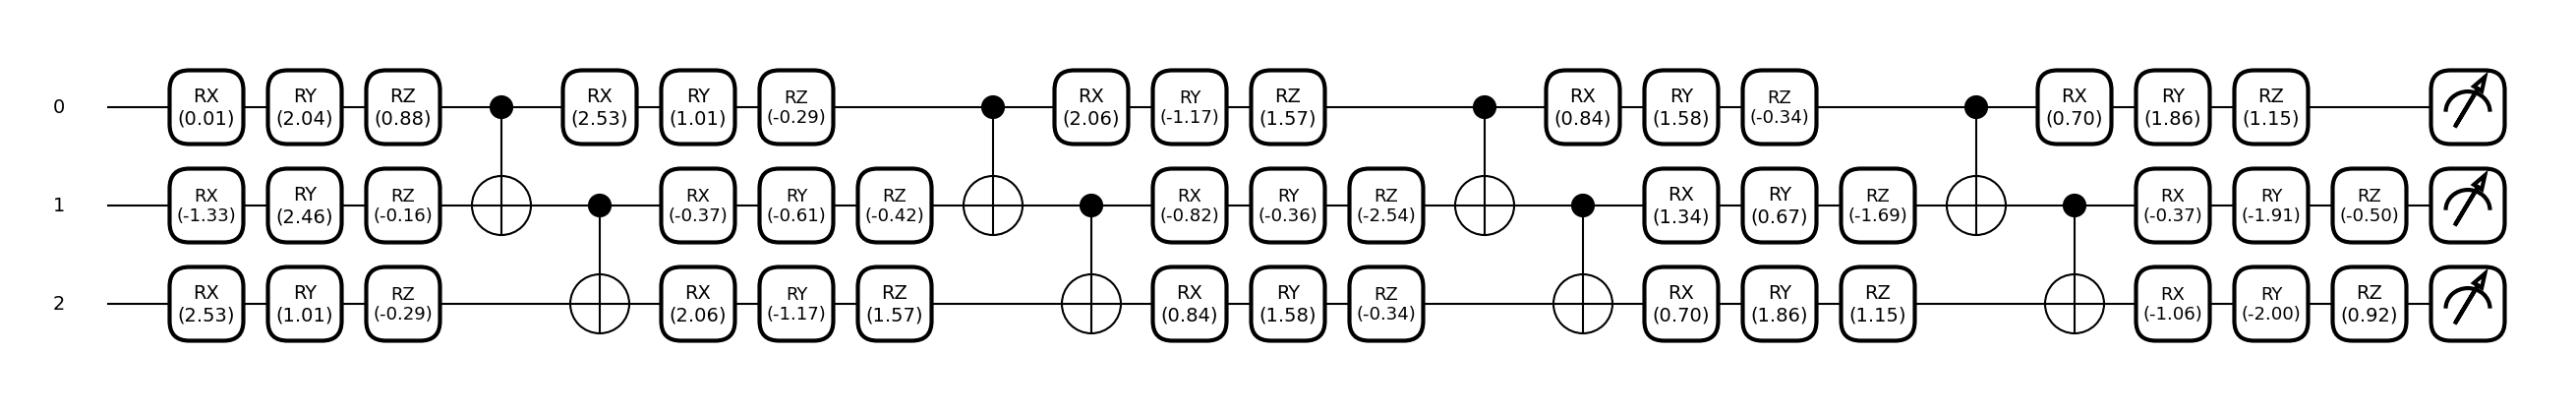

In [ ]:
depht = n_qubits+1
n = 3*n_qubits*(1+depht)
target_vector, alpha = init_state_rsvg(n_qubits)
params = random_params(n)
device = get_device(n_qubits)
@qml.qnode(device, interface="torch")
def circuit(params, M=None):
    w = []
    aux = 0
    for j in range(n_qubits):
        qml.RX(params[j+aux], wires=j)
        qml.RY(params[j+1+aux], wires=j)
        qml.RZ(params[j+2+aux], wires=j)
        w.append(j)
        aux+=2
    if n_qubits == 1:
        for z in range(1,depht):
            qml.RX(params[j+aux], wires=j)
            qml.RY(params[j+1+aux], wires=j)
            qml.RZ(params[j+2+aux], wires=j)
            aux+=2
        return qml.expval(qml.Hermitian(M, wires=w))
    for z in range(depht):
        for i in range(n_qubits-1):
            qml.CNOT(wires=[i,i+1])
        for j in range(n_qubits):
            qml.RX(params[j+aux], wires=j)
            qml.RY(params[j+1+aux], wires=j)
            qml.RZ(params[j+2+aux], wires=j)
            aux+=2
    return qml.expval(qml.Hermitian(M, wires=w))
fig, ax = qml.draw_mpl(circuit, decimals=2)(params, alpha)
plt.show()

In [ ]:
best_params, f = train(2, circuit, params, alpha)

1 0.002384185791015636


In [ ]:
best_params, f = train(2, circuit, params, alpha)

1 0.002289772033691417


In [ ]:
def variancia(x_list, x1):
    x_med = sum(x_list)/len(x_list)
    var = (abs(x_med)-abs(x1))**2
    return var, x_med


# params_for_variance=[]
#mean = sum([i for i in params_for_variance])/len(params_for_variance)
# mean2 = 'x


In [ ]:
x_list1 = [2, 2, 4, 5, 25]
x_list2 = [2, 2, 2, 2, 25]
x1 = 7.6
x2 = 25.6
print(variancia(x_list1,x1))
print(variancia(x_list1,x2))

(0.0, 7.6)
(324.0, 7.6)


In [34]:
import sys
class VQA:
    def __init__(self, n_qubits):#, target_vector, params, device):
        self.n_qubits = n_qubits
        self.depht = n_qubits+1
        n = 3*n_qubits*(1+depht)
        target_vector, _ = init_state_rsvg(n_qubits)
        params = random_params(n)
        device = get_device(n_qubits)
        self.target_vector = target_vector
        self.params = params
        self.device = device
        print(f'n_qubits = {n_qubits}')
        print(f'depth = {depht}')
        print(f'sizeof(params) =  {sys.getsizeof(params)/1000} kbytes ')
        print(f'sizeof(target_vector) = {sys.getsizeof(target_vector)/1000} kbytes ')
    
    @qml.qnode(device, interface="torch")
    def circuit(params, M=None):
        w = []
        aux = 0
        for j in range(n_qubits):
            qml.RX(params[j+aux], wires=j)
            qml.RY(params[j+1+aux], wires=j)
            qml.RZ(params[j+2+aux], wires=j)
            w.append(j)
            aux+=2
        if n_qubits == 1:
            for z in range(1,depht):
                qml.RX(params[j+aux], wires=j)
                qml.RY(params[j+1+aux], wires=j)
                qml.RZ(params[j+2+aux], wires=j)
                aux+=2
            return qml.expval(qml.Hermitian(M, wires=w))
        for z in range(depht):
            for i in range(n_qubits-1):
                qml.CNOT(wires=[i,i+1])
            for j in range(n_qubits):
                qml.RX(params[j+aux], wires=j)
                qml.RY(params[j+1+aux], wires=j)
                qml.RZ(params[j+2+aux], wires=j)
                aux+=2
        return qml.expval(qml.Hermitian(M, wires=w))

n_qubits = 1
depht = n_qubits+1
n = 3*n_qubits*(1+depht)
target_vector, alpha = init_state_rsvg(n_qubits)
params = random_params(n)
device = get_device(n_qubits)

In [35]:
model = VQA(n_qubits)#, target_vector, params, device)
circuit = model.circuit
#model.circuit(params)
#print(circuit)

n_qubits = 1
depth = 2
sizeof(params) =  0.072 kbytes 
sizeof(target_vector) = 0.136 kbytes 


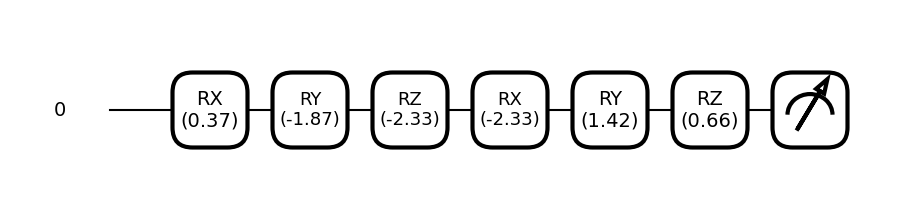

In [36]:
fig, ax = qml.draw_mpl(circuit, decimals=2)(params, alpha)
plt.show()